# cfDNA simulations 

Assess perform of our EM algorithm in pure simulated data 

# Functions

## Imports

In [1]:
import numpy as np 
import pandas as pd 
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pkl

## Load EM results

In [2]:
def load_pickles(directory, parameter):
    """
    output from EM is a pickle file of estimate and true simulation values 
    load these pickles into dataframe 
    """
    
    est_files = glob.glob(directory + "/*" + parameter + "_est.pkl")  # estimates from EM 
    df = pd.DataFrame(columns={"estimate", "individual", "truth", "tissue", "iteration"})  # intialize dataframe

    
    for file in range(len(est_files)):  # iterate over all random restarts in the directory 
        
        est_file = est_files[file]  # get all estimates 
        true_file = est_file.replace("est", "true")  # true simulations 
        
        true = pkl.load(open(true_file, "rb"))
        est = pkl.load(open(est_file, "rb"))
        
        for individual, pair in enumerate(zip(est, true)): 
            e, t = pair[0], pair[1]
            
            for i in range(len(t)):  # add each estimate for each tissue to dataframe 
                df = df.append({"estimate":e[i], "individual":individual, "truth":t[i], 
                            "tissue":i, "iteration":file}, ignore_index=True)
        
    return df


In [5]:
def load_gamma_corr(directory, parameter):
    """
    calculate the correlation between the true and estimated EM output from the pickle files 
    """
    
    est_files = glob.glob(directory + "/*" + parameter + "_est.pkl")
    df = pd.DataFrame(columns={"tissue", "correlation"})

    
    for file in range(len(est_files)):
        # load the files
        est_file = est_files[file]
        true_file = est_file.replace("est", "true")
        
        true = pkl.load(open(true_file, "rb"))
        est = pkl.load(open(est_file, "rb"))
        
        for t in range(est.shape[0]): 
            corr = np.corrcoef(true[t, :], est[t, :])[0][1]  # calculate the correlation 
            df = df.append({"tissue":t, "correlation":corr}, ignore_index=True)
    
    return df

# Pure Simulations

## Uniform Random Varying Depth 

Generate true methylation proportions from a random uniform. Vary the read depth of the input and reference data. 

### 1x

In [11]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_one_person_1x/"
one_per_1x = load_pickles(directory, "alpha")
gamma_corr_1x = load_gamma_corr(directory, "gamma")

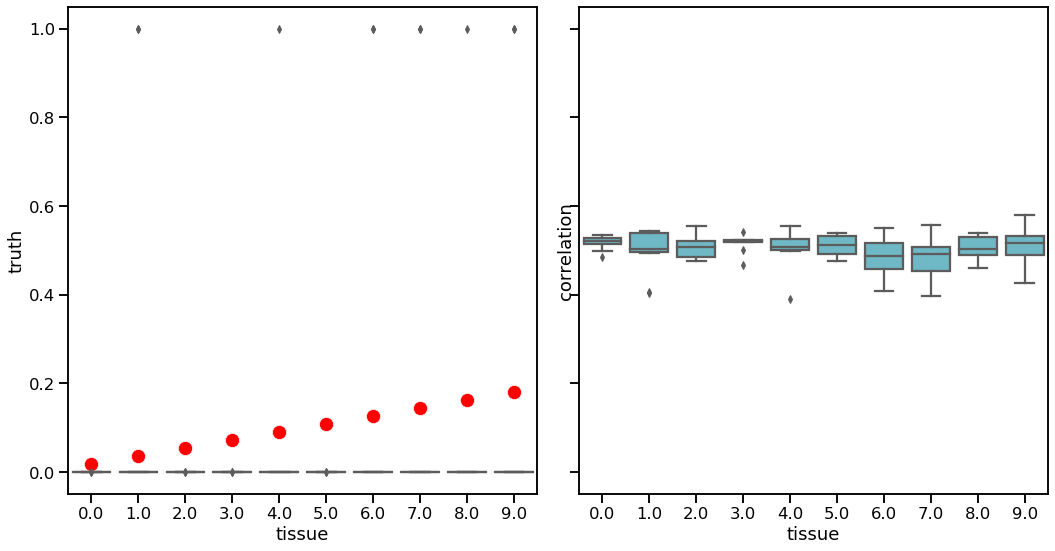

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,8))

sns.set_context("talk")

sns.boxplot("tissue", "estimate", data = one_per_1x, color="#61c2d3", ax=ax1)
sns.scatterplot("tissue", "truth", data = one_per_1x, color="red", s=200, ax=ax1)
sns.boxplot("tissue", "correlation", data=gamma_corr_1x, color="#61c2d3", ax=ax2)

fig.tight_layout()


### 10x

In [32]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_one_person_10x/"
one_per_10x = load_pickles(directory, "alpha")
gamma_corr_10x = load_gamma_corr(directory, "gamma")

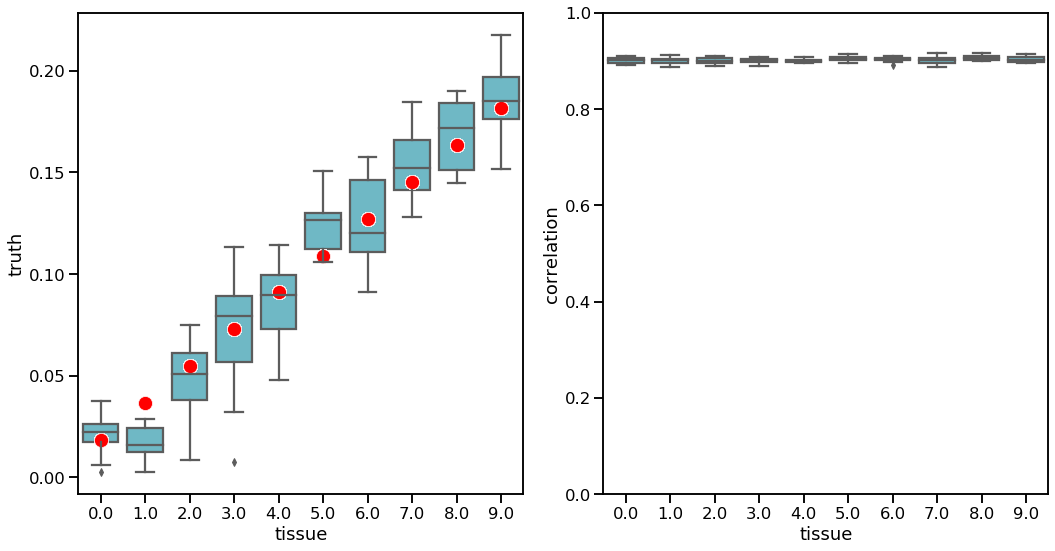

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,8))

sns.set_context("talk")

sns.boxplot("tissue", "estimate", data = one_per_10x, color="#61c2d3", ax=ax1)
sns.scatterplot("tissue", "truth", data = one_per_10x, color="red", s=200, ax=ax1)
sns.boxplot("tissue", "correlation", data=gamma_corr_10x, color="#61c2d3", ax=ax2)
ax2.set_ylim(0, 1)
fig.tight_layout()


In [36]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/simple_one_person_100x/"
one_per_100x = load_pickles(directory, "alpha")
gamma_corr_100x = load_gamma_corr(directory, "gamma")

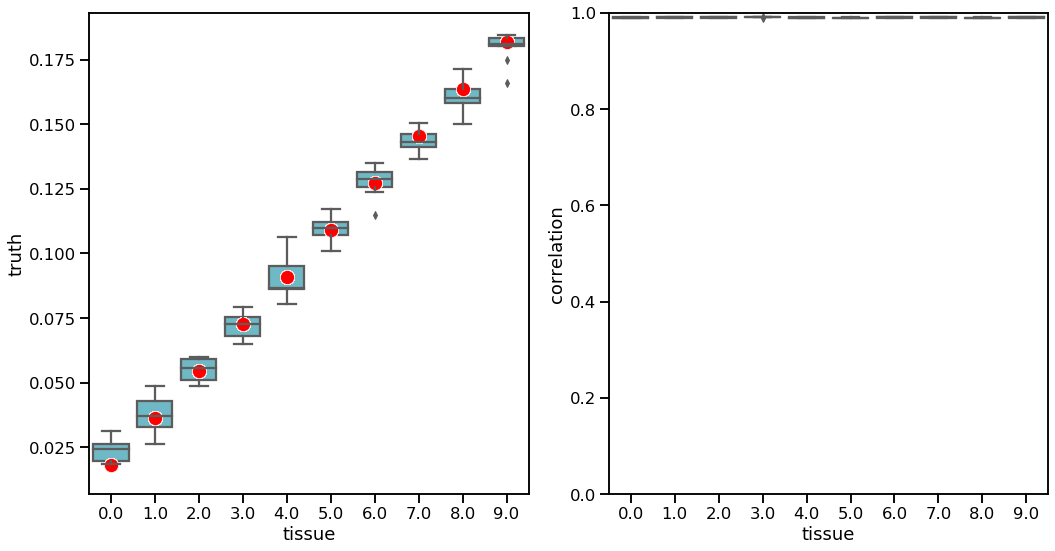

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,8))

sns.set_context("talk")

sns.boxplot("tissue", "estimate", data = one_per_100x, color="#61c2d3", ax=ax1)
sns.scatterplot("tissue", "truth", data = one_per_100x, color="red", s=200, ax=ax1)
sns.boxplot("tissue", "correlation", data=gamma_corr_100x, color="#61c2d3", ax=ax2)
ax2.set_ylim(0, 1)
fig.tight_layout()
